In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("datasets/salaries.csv")

In [4]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [7]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [8]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [12]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])

In [13]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [14]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
from sklearn import tree

In [18]:
model=tree.DecisionTreeClassifier()

In [20]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [23]:
model.score(inputs_n,target)

1.0

In [26]:
model.predict([[2,0,1]])

array([1])

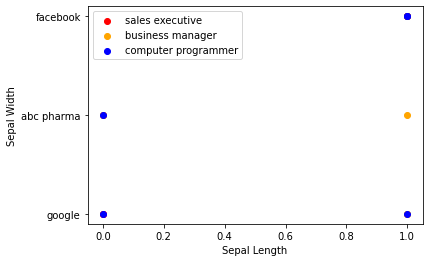

In [29]:
import matplotlib.pyplot as plt
colors=['red','orange','blue']

species=['sales executive','business manager','computer programmer']
for i in range(3):
    x=df[df['job']==species[i]]
    plt.scatter(x['salary_more_then_100k'],x['company'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [31]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("datasets/titanic.csv")

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)


In [38]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [39]:
df.head()train_test_split

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [40]:
inputs=df.drop('Survived',axis='columns')

In [42]:
target=df.Survived

In [43]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
inputs.Sex=inputs.Sex.map({'male':0,'female':1})

In [45]:
inputs

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [46]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [47]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [48]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [49]:
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [52]:
X_train.shape

(712, 4)

In [53]:
from sklearn import tree

In [54]:
model=tree.DecisionTreeClassifier()

In [56]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
model.score(X_test,y_test)

0.7877094972067039

# Random Forest Algo

In [59]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [60]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

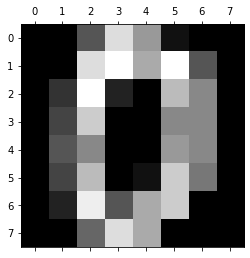

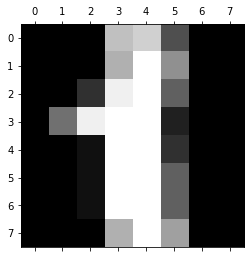

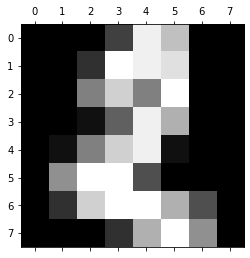

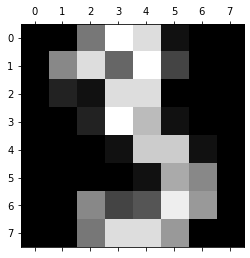

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

for i in range(4):
    plt.matshow(digits.images[i])

In [64]:
df=pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [66]:
df['target']=digits.target

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [80]:
model.score(X_test,y_test)

0.9694444444444444

In [81]:
y_predicted=model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

In [83]:
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 28]])

Text(69.0, 0.5, 'Truth')

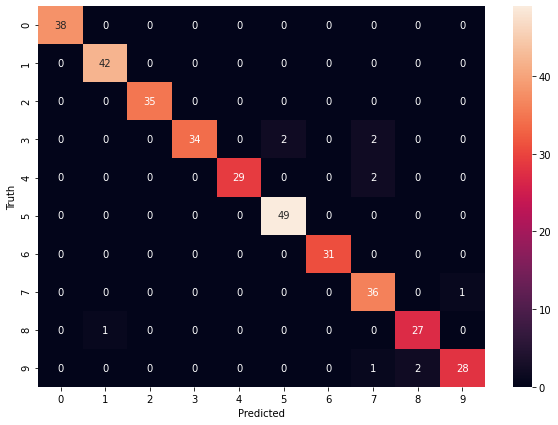

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
1+2

3

# Cross Validation

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits =load_digits()

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(digits.data,digits.target,test_size=0.5)

In [134]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/home/srinjay/Documents/machine-learning/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9599555061179088

In [135]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9866518353726362

In [136]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9632925472747497

In [156]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf


KFold(n_splits=3, random_state=None, shuffle=False)

In [157]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index,test_index)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [163]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [181]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [182]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index,test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test=digits.data[train_index] , digits.data[test_index], \
                                  digits.target[train_index] , digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))        
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))        

/home/srinjay/Documents/machine-learning/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/srinjay/Documents/machine-learning/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [183]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [184]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [185]:
scores_rf

[0.9332220367278798, 0.9432387312186978, 0.9198664440734557]

In [186]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=10000),digits.data,digits.target)

array([0.925     , 0.875     , 0.93871866, 0.93314763, 0.89693593])

In [180]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [192]:
for i in range(1,100):
    print(i ,":" ,cross_val_score(RandomForestClassifier(n_estimators=i),digits.data,digits.target))

1 : [0.675      0.64444444 0.76044568 0.70752089 0.70752089]
2 : [0.69722222 0.71111111 0.77715877 0.78272981 0.74373259]
3 : [0.84166667 0.73055556 0.88857939 0.8551532  0.80222841]
4 : [0.86666667 0.79722222 0.87743733 0.88022284 0.84958217]
5 : [0.86111111 0.77222222 0.86629526 0.90250696 0.84679666]
6 : [0.89444444 0.85       0.90529248 0.91643454 0.87743733]
7 : [0.87777778 0.825      0.91922006 0.90529248 0.87465181]
8 : [0.89722222 0.81944444 0.91643454 0.91922006 0.88857939]
9 : [0.88055556 0.86666667 0.91922006 0.94428969 0.8913649 ]
10 : [0.91388889 0.82777778 0.91922006 0.94428969 0.89693593]
11 : [0.89444444 0.85555556 0.93593315 0.93314763 0.88857939]
12 : [0.91666667 0.83055556 0.93036212 0.93036212 0.8913649 ]
13 : [0.89722222 0.86111111 0.94150418 0.94428969 0.90807799]
14 : [0.90277778 0.87222222 0.94986072 0.95821727 0.89972145]
15 : [0.89444444 0.86666667 0.93593315 0.95821727 0.88300836]
16 : [0.90555556 0.88333333 0.93593315 0.94707521 0.91643454]
17 : [0.92222222 